# 라이브러리 

In [153]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'Malgun Gothic'

# 데이터 불러오기 및 전처리

## KIND : 상장폐지 기업 리스트

In [293]:
ksd = pd.read_excel('./Data/상장폐지현황.xlsx',engine='openpyxl')
ksd = ksd.sort_values('번호')
ksd

,번호,회사명,종목코드,폐지일자,폐지사유,비고
701,1,티엘씨레저,14590,2000-01-06,증권거래소 상장,NaN
700,2,한세예스24홀딩스,16450,2000-01-06,증권거래소 상장,한세예스24홀딩스
699,3,미래에셋박현주사호펀,34280,2000-01-11,증권투자회사법 64조에 의한 해산사유 발생,NaN
698,4,삼성다이나믹증권투자,34260,2000-01-11,증권투자회사법 64조에 의한 해산사유 발생,NaN
697,5,박현주 5호,34290,2000-01-11,증권투자회사법 64조에 의한 해산사유 발생,NaN
...,...,...,...,...,...,...
4,698,엔에이치SL스팩,207720,2017-10-16,상장예비심사 청구서 미제출로 관리종목 지정 후 1개월 이내 동 사유 미해소,NaN
3,699,골든브릿지제2호스팩,206660,2017-10-20,상장예비심사 청구서 미제출로 관리종목 지정 후 1개월 이내 동 사유 미해소,NaN
2,700,SK1호스팩,207930,2017-11-06,상장예비심사 청구서 미제출로 관리종목 지정 후 1개월 이내 동 사유 미해소,NaN
1,701,아이이,23430,2017-12-20,기업의 계속성 및 경영의 투명성 등을 종합적으로 고려하여 상장폐지기준에 해당한다고 결정,NaN


## 부도 정의에 부합하는 기업들만 뽑기 

In [297]:
# 상장폐지사유에서 부도 정의 기업 뽑기 
default = ksd[ksd['폐지사유'].str.contains('부도')]
composition =ksd[ksd['폐지사유'].str.contains('화의절차개시신청')]
disclaimer = ksd[ksd['폐지사유'].str.contains('감사의견거절')]
disclaimer_2 = ksd[ksd['폐지사유'].str.contains('의견 거절')]
suspension = ksd[ksd['폐지사유'].str.contains('은행거래정지')]	
liquidation = ksd[ksd['폐지사유'].str.contains('회사정리절차')]
afc = ksd[ksd['폐지사유'].str.contains('개시신청')]#Application for commencement
erosion = ksd[ksd['폐지사유'].str.contains('전액잠식')] #완전잠식기업 
adverse_opinion = ksd[ksd['폐지사유'].str.contains('부적정')] #감사의견 부적정 

In [298]:
ksd_default = pd.merge(default, composition,how='outer')
ksd_default = pd.merge(ksd_default,disclaimer,how='outer')
ksd_default = pd.merge(ksd_default,suspension,how='outer')
ksd_default = pd.merge(ksd_default,disclaimer_2,how='outer')
ksd_default = pd.merge(ksd_default,liquidation,how='outer')
ksd_default = pd.merge(ksd_default,afc,how='outer')
ksd_default = pd.merge(ksd_default,erosion,how='outer')
ksd_default = pd.merge(ksd_default,adverse_opinion,how='outer')

In [9]:
ksd_default

,번호,회사명,종목코드,폐지일자,폐지사유,비고
0,29,라인건설,17620,2000-06-07,"최종부도 또는 당좌거래정지(1년) , 기타 등록취소",NaN
1,30,주화산업,17740,2000-06-07,"최종부도 또는 당좌거래정지(1년) , 자본전액잠식(2년) , 기타 등록취소",NaN
2,31,아진산업,13310,2000-06-07,"최종부도 또는 당좌거래정지(1년) , 자본전액잠식(2년) , 기타 등록취소 , 주식...",아진산업
3,32,교하산업,13850,2000-06-07,"최종부도 또는 당좌거래정지(1년) , 기타 등록취소 , 자본전액잠식(2년)",NaN
4,35,삼산,12010,2000-06-07,"최종부도 또는 당좌거래정지(1년) , 보고서미제출 , 기타 등록취소 , 주식분산기준미달",NaN
...,...,...,...,...,...,...
256,267,한마음저축은행,25450,2004-10-07,감사의견부적정(취소사유발생일 : 2004년 9월 17일),NaN
257,286,한아시스템,36020,2005-04-02,감사의견 부적정(상장폐지사유 발생일 : 2005년 03월 21일),NaN
258,425,디보스,80140,2010-02-02,자본잠식률 50%이상사유로 관리종목지정후 반기 감사의견 부적정,NaN
259,524,디패션,30420,2011-05-07,감사의견 부적정,NaN


## 기업재무데이터 불러오기

In [118]:
RAW = pd.read_excel('./Data/origin_raw.xlsx',engine='openpyxl') #ts2000자료 
RAW = RAW.sort_values(by=['회사명','회계년도'],ascending=[True,True])
RAW.reset_index(drop=True,inplace=True)

In [11]:
RAW

,회사명,거래소코드,회계년도,유동비율,차입금의존도,매출액증가율,유형자산증가율,총자본증가율,매출액총이익률,매출액영업이익률,...,매입채무회전률,매입채무회전기간,재고자산회전기간,매출채권회전기간,영업이익(손실),자산,부채,유동자산,이익잉여금,이자비용
0,(주)CMG제약,58820,2000-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1534583.0,28990239.0,16094696.0,21169229.0,5482178.0,307112.0
1,(주)CMG제약,58820,2001-12-01,141.01,50.60,0.00,0.00,0.00,5.53,1.86,...,24.84,14.69,324.15,0.33,294030.0,20907767.0,12118565.0,16358828.0,110431.0,284906.0
2,(주)CMG제약,58820,2002-12-01,114.21,53.16,66.81,-17.72,-26.34,-10.12,-14.46,...,58.88,6.20,155.54,0.28,-3817019.0,15401443.0,8866545.0,9879653.0,-2144318.0,382103.0
3,(주)CMG제약,58820,2003-12-01,185.63,29.13,-34.12,-79.37,-28.17,0.70,-5.26,...,26.59,13.73,166.81,1.03,-914055.0,11063246.0,4629769.0,8534056.0,-2245738.0,271348.0
4,(주)CMG제약,58820,2004-12-01,149.73,29.59,-24.76,-25.94,-53.18,-14.51,-21.69,...,24.16,15.11,152.03,1.46,-2838322.0,5179471.0,2619228.0,3893362.0,-6118972.0,123816.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22591,흥구석유(주),24060,2013-12-01,210.77,5.62,-8.91,-0.42,-4.74,3.28,-0.08,...,202158.67,0.00,5.41,12.54,-210489.0,71160689.0,6440014.0,12345322.0,28369144.0,106306.0
22592,흥구석유(주),24060,2014-12-01,796.68,0.00,-22.26,-8.83,-2.83,4.19,0.60,...,199918.93,0.00,5.58,11.63,1161508.0,69144163.0,2977811.0,16396422.0,29814821.0,18049.0
22593,흥구석유(주),24060,2015-12-01,504.11,6.41,-19.73,-0.74,12.89,4.71,0.30,...,114471.12,0.00,4.48,12.38,462400.0,78054324.0,9827094.0,13780331.0,31875699.0,55117.0
22594,흥구석유(주),24060,2016-12-01,411.65,7.58,-7.26,-5.61,1.39,5.33,0.67,...,179576.67,0.00,5.29,12.28,963788.0,79137160.0,9959634.0,14793582.0,32825995.0,125854.0


# 부도 라벨링

In [119]:
default_label = ksd_default['종목코드'].tolist()

RAW['부도'] = 0

a = RAW[RAW['거래소코드'].isin(default_label)]
company=a['회사명'].unique() #부도기업 고유이름 

lst = [] #부도만 담을 빈 리스트 생성
lst2 = [] # 그레이존만 담은 빈 리스트 생성
for i in range(len(company)):
    lst.append((RAW[RAW['회사명']== company[i]]['부도'].index[-1]))
    if int(len(RAW[RAW['회사명']== company[i]])>1):    
        lst2.append((RAW[RAW['회사명']== company[i]]['부도'].index[-2]))
    #회사명이 부도인 애들만 골라서, 그중 맨 최근컬럼을 빈 리스트에 append 
    
for i in range(len(lst)):
    RAW.loc[lst[i],'부도'] = 1
    
for i in range(len(lst2)):    
    RAW.loc[lst2[i],'부도'] = 0.5
    #부도기업 리스트인 것에 1값 부여 
# RAW

In [19]:
len(lst2), len(lst)

(244, 254)

In [120]:
RAW['회계년도']=RAW['회계년도'].apply(lambda x : pd.to_datetime(str(x), format='%Y-%m-%d'))
RAW.iloc[:,2]=RAW['회계년도'].dt.strftime('%Y')

default_label =ksd_default['회사명'].unique().tolist()
test = '|'.join(default_label)

# 국면별 정상&부도 기업 데이터 나누기

In [130]:
expansion_y =list(map(str,[2002,2006,2007,2010,2014,2015,2016]))
recession_y =list(map(str,[2003,2004,2008,2009,2012]))
transition_y =list(map(str,[2000,2001,2005,2011,2013,2017]))

def cls_default(cycle):
    globals()['{}'.format(cycle)] = RAW[RAW['회계년도'].isin(globals()["{}_y".format(cycle)])]
    
    globals()['{}_normal'.format(cycle)] =globals()['{}'.format(cycle)][globals()['{}'.format(cycle)]['부도']==0]
    globals()['{}_normal'.format(cycle)].reset_index(drop=True, inplace=True)    
    
    globals()['{}_default'.format(cycle)] =globals()['{}'.format(cycle)][globals()['{}'.format(cycle)]['부도']==1]
    globals()['{}_default'.format(cycle)].reset_index(drop=True, inplace=True)    
    
    d = pd.DataFrame(globals()['{}_default'.format(cycle)]['회계년도'].value_counts()).rename(columns={'회계년도':'부도'})
    n = pd.DataFrame(globals()['{}_normal'.format(cycle)]['회계년도'].value_counts()).rename(columns={'회계년도':'정상'})
    
    globals()['{}_cnt'.format(cycle)] = pd.concat([n,d],axis=1).sort_index().T

In [135]:
cls_default(cycle = 'expansion')
cls_default(cycle = 'recession')
cls_default(cycle = 'transition')

In [99]:
def cls_year(cycle):
    for year in globals()["{}_y".format(cycle)]:
        # print(year)
        globals()['norm_{}'.format(year)] =  globals()['{}_normal'.format(cycle)][ globals()['{}_normal'.format(cycle)]['회계년도']==year]
        globals()['default_{}'.format(year)] =  globals()['{}_default'.format(cycle)][ globals()['{}_default'.format(cycle)]['회계년도']==year]       

In [100]:
cls_year('expansion')
cls_year('recession')
cls_year('transition')

In [138]:
print('##### 확장기')
print(f'정상 기업 수 : {len(expansion_normal["회사명"].unique())}')
print(f'부도 기업 수 : {len(expansion_default["회사명"].unique())}')
print('##### 수축기')
print(f'정상 기업 수 : {len(recession_normal["회사명"].unique())}')
print(f'부도 기업 수 : {len(recession_default["회사명"].unique())}')
print('##### 과도기')
print(f'정상 기업 수 : {len(transition_normal["회사명"].unique())}')
print(f'부도 기업 수 : {len(transition_default["회사명"].unique())}')


##### 확장기
정상 기업 수 : 1778
부도 기업 수 : 73
##### 수축기
정상 기업 수 : 1525
부도 기업 수 : 129
##### 과도기
정상 기업 수 : 1964
부도 기업 수 : 47


# 시각화

In [229]:
all = pd.concat([expansion_cnt,recession_cnt,transition_cnt],axis=1)
all = all.T.sort_index().T
all

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
정상,905,1003,1070,1066,1119,1162,1205,1265,1238,1201,1188,1184,1188,1221,1251,1309,1346,1467
부도,2,8,14,31,22,2,6,10,35,28,26,17,13,12,7,6,4,6


In [241]:
cycle = pd.DataFrame({'정상':[expansion_cnt.T['정상'].sum(),recession_cnt.T['정상'].sum(),transition_cnt.T['정상'].sum()],
              '부도':[expansion_cnt.T['부도'].sum(),recession_cnt.T['부도'].sum(),transition_cnt.T['부도'].sum()]},
             index=['확장기','수축기','전환기'])

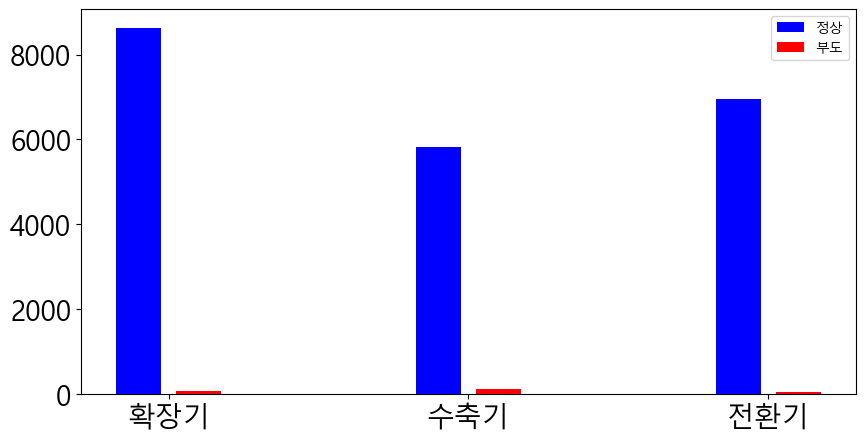

In [242]:
w = 0.1
nrow =cycle.shape[0]
idx = np.arange(nrow)
idx

plt.figure(figsize=(10,5))
plt.bar(idx-w,cycle['정상'],label = '정상',color ='blue',width=0.15)
plt.bar(idx+w,cycle['부도'],label = '부도',color='red',width=0.15)
plt.xticks(idx,cycle.index)

plt.legend()
plt.show()

In [230]:
a = all.T.reset_index()
a['index']=a['index'].astype(int)

,index,정상,부도
0,2000,905,2
1,2001,1003,8
2,2002,1070,14
3,2003,1066,31
4,2004,1119,22
5,2005,1162,2
6,2006,1205,6
7,2007,1265,10
8,2008,1238,35
9,2009,1201,28


[matplotlib 특정 구간 강조하기](https://financedata.github.io/posts/faq_matplotlib_highlight.html)

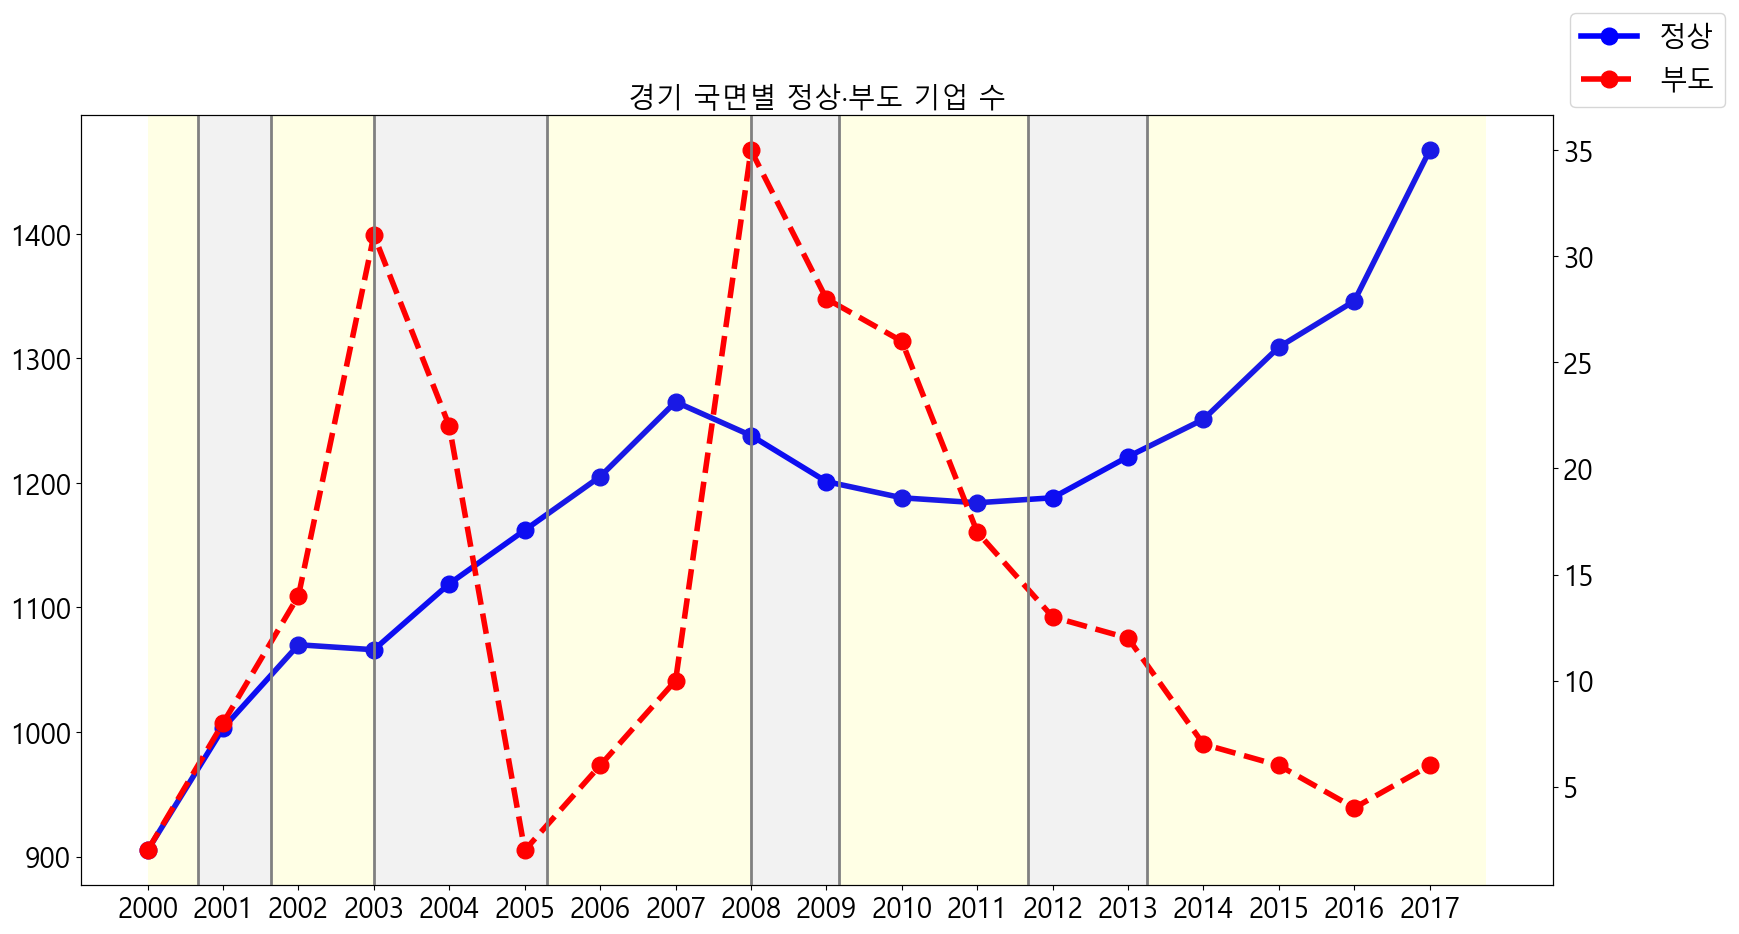

In [357]:
parameters = {'axes.labelsize': 25,
          'axes.titlesize': 35,
          'xtick.labelsize':20,
          'ytick.labelsize':20}
plt.rcParams.update(parameters)
ax = a.plot(x='index', y="정상", xlabel='',color='b',legend=False,figsize=(19,10),linewidth='4',marker='o',markersize='12')
ax2 = ax.twinx()
a.plot(x='index', y="부도", ax=ax2, legend=False, color="r",linestyle = '--',linewidth='4',marker='o',markersize='12')
plt.title('경기 국면별 정상·부도 기업 수',fontsize=20)

plt.xticks(a['index'])
ax.figure.legend(fontsize=20)
# x = [2000,2000.67,2001.63, 2003, 2005.3,2008,2009.17,2011.67,2013.25,2017.75]
plt.axvline(x=2000.67,color='gray',linewidth='2')
plt.axvspan(2000,2000.67, facecolor='yellow', alpha=0.1)

plt.axvline(x=2001.63,color='gray',linewidth='2')
plt.axvspan(2000.67,2001.63, facecolor='gray', alpha=0.1)

plt.axvline(x=2003,color='gray',linewidth='2')
plt.axvspan(2001.63,2003, facecolor='yellow', alpha=0.1)

plt.axvline(x=2005.3,color='gray',linewidth='2')
plt.axvspan(2003,2005.3, facecolor='gray', alpha=0.1)

plt.axvline(x=2008,color='gray',linewidth='2')
plt.axvspan(2005.3,2008, facecolor='yellow', alpha=0.1)

plt.axvline(x=2009.17,color='gray',linewidth='2')
plt.axvspan(2008,2009.17, facecolor='gray', alpha=0.1)

plt.axvline(x=2011.67,color='gray',linewidth='2')
plt.axvspan(2009.17,2011.67, facecolor='yellow', alpha=0.1)

plt.axvline(x=2013.25,color='gray',linewidth='2')
plt.axvspan(2011.67,2013.25, facecolor='gray', alpha=0.1)
plt.axvspan(2013.25,2017.75, facecolor='yellow', alpha=0.1)


# plt.axvline(x=2017.75,color='gray')


plt.show()

In [ ]:
ksd_default['폐지일자']=ksd_default['폐지일자'].apply(lambda x : pd.to_datetime(str(x), format='%Y-%m-%d'))
ksd_default.iloc[:,3]=ksd_default['폐지일자'].dt.strftime('%Y')
# ksd_default

In [369]:
df = ksd_default.groupby('폐지일자')[['회사명']].count()
df.reset_index(inplace=True)
# df['회사명'].tolist()
lst = df['회사명'].tolist()

all_1 = all.T.copy()
all_1['부도'] = lst

all_1['부도비율'] = all_1['부도']/(all_1['부도']+all_1['정상'])
all_1['부도비율'] = all_1['부도비율']*100

all_1= all_1.reset_index()
all_1['index']=all_1['index'].astype(int)

all_1


,index,정상,부도,부도비율
0,2000,905,15,1.630435
1,2001,1003,3,0.298211
2,2002,1070,9,0.834106
3,2003,1066,14,1.296296
4,2004,1119,28,2.441151
5,2005,1162,26,2.188552
6,2006,1205,2,0.165700
7,2007,1265,5,0.393701
8,2008,1238,11,0.880705
9,2009,1201,34,2.753036


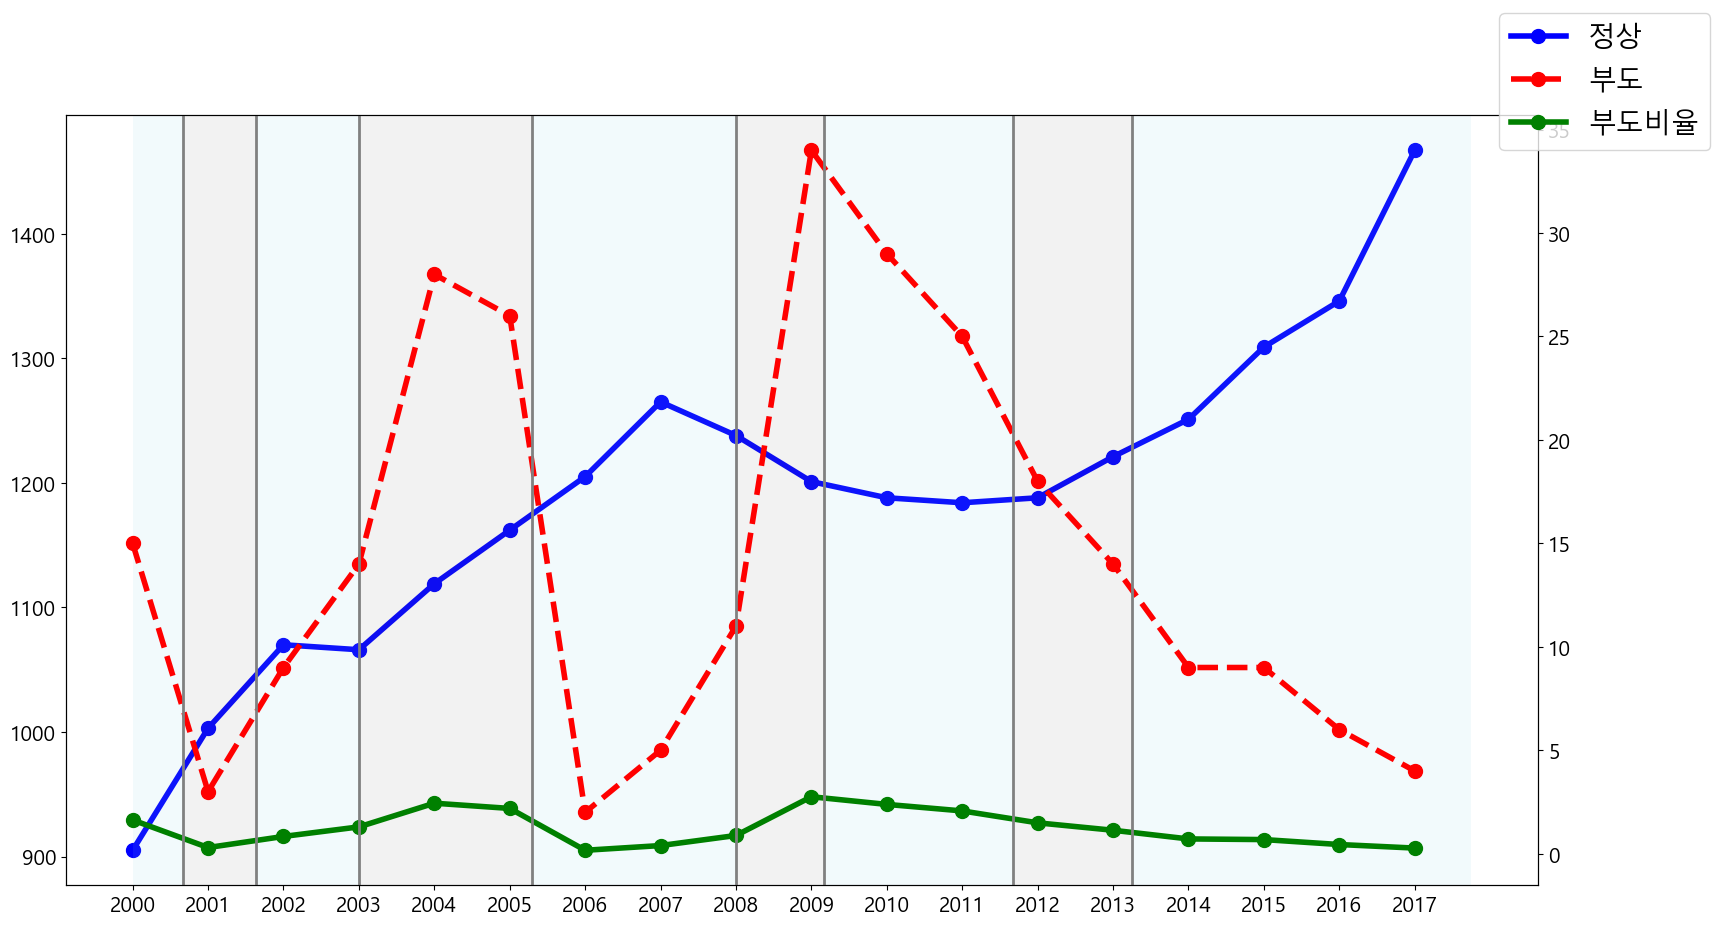

In [392]:
parameters = {'axes.labelsize': 15,
          'axes.titlesize': 15,
          'xtick.labelsize':15,
          'ytick.labelsize':15,}
plt.rcParams.update(parameters)

ax = all_1.plot(x='index', y="정상", xlabel='',color='b',legend=False,figsize=(19,10),linewidth='4',marker='o',markersize='10')
ax2 = ax.twinx()
all_1.plot(x='index', y="부도", ax=ax2, legend=False, color="r",linestyle = '--',linewidth='4',marker='o',markersize='10')

plt.plot(all_1['index'],all_1['부도비율'],color='green',linewidth='4',marker='o',markersize='10')

# plt.title('경기 국면별 정상·부도 기업 수',fontsize=20)
plt.xticks(a['index'])
ax.figure.legend(['정상','부도','부도비율'],fontsize=20)
# x = [2000,2000.67,2001.63, 2003, 2005.3,2008,2009.17,2011.67,2013.25,2017.75]
plt.axvline(x=2000.67,color='gray',linewidth='2')
plt.axvspan(2000,2000.67, facecolor='skyblue', alpha=0.1)

plt.axvline(x=2001.63,color='gray',linewidth='2')
plt.axvspan(2000.67,2001.63, facecolor='gray', alpha=0.1)

plt.axvline(x=2003,color='gray',linewidth='2')
plt.axvspan(2001.63,2003, facecolor='skyblue', alpha=0.1)

plt.axvline(x=2005.3,color='gray',linewidth='2')
plt.axvspan(2003,2005.3, facecolor='gray', alpha=0.1)

plt.axvline(x=2008,color='gray',linewidth='2')
plt.axvspan(2005.3,2008, facecolor='skyblue', alpha=0.1)

plt.axvline(x=2009.17,color='gray',linewidth='2')
plt.axvspan(2008,2009.17, facecolor='gray', alpha=0.1)

plt.axvline(x=2011.67,color='gray',linewidth='2')
plt.axvspan(2009.17,2011.67, facecolor='skyblue', alpha=0.1)

plt.axvline(x=2013.25,color='gray',linewidth='2')
plt.axvspan(2011.67,2013.25, facecolor='gray', alpha=0.1)
plt.axvspan(2013.25,2017.75, facecolor='skyblue', alpha=0.1)

plt.show()